In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

austin_weather = pd.read_csv('/kaggle/input/austin-weather/austin_weather.csv', encoding='ISO-8859-1')

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mmean_squared_error, r2_score

In [22]:
# Read the dataset
import pandas as pd
data=pd.read_csv('austin_weather.csv')
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [23]:
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [24]:
data1 = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',  
                  'SeaLevelPressureLowInches','TempHighF','TempLowF','DewPointHighF','DewPointLowF','HumidityHighPercent','HumidityLowPercent','VisibilityHighMiles','VisibilityLowMiles','WindHighMPH','WindGustMPH' ], axis = 1) 

In [25]:
data1.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches
0,60,49,75,29.68,7,4,0.46
1,48,36,68,30.13,10,6,0
2,45,27,52,30.49,10,3,0
3,46,28,56,30.45,10,4,0
4,50,40,71,30.33,10,2,T


In [26]:
data1=data1.replace('T',0.0)

In [27]:
data1.info

<bound method DataFrame.info of       TempAvgF DewPointAvgF HumidityAvgPercent SeaLevelPressureAvgInches  \
0           60           49                 75                     29.68   
1           48           36                 68                     30.13   
2           45           27                 52                     30.49   
3           46           28                 56                     30.45   
4           50           40                 71                     30.33   
...        ...          ...                ...                       ...   
1314        89           67                 54                     29.97   
1315        91           64                 54                      29.9   
1316        92           64                 51                     29.86   
1317        93           68                 48                     29.91   
1318        88           61                 43                     29.97   

     VisibilityAvgMiles WindAvgMPH PrecipitationSumInch

In [28]:
data1.describe()

,TempAvgF
count,1319.000000
mean,70.642911
std,14.045904
min,29.000000
25%,62.000000
50%,73.000000
75%,83.000000
max,93.000000


In [29]:
import numpy as np
data1 = data.replace('-',np.NaN)

In [30]:
data1 = data.dropna()

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [ ]:
data1["DewPointAvgF"] = data1["DewPointAvgF"].astype(float)

In [ ]:
data1["HumidityAvgPercent"] = data1["HumidityAvgPercent"].astype(float)

In [ ]:
data1["SeaLevelPressureAvgInches"] = data1["SeaLevelPressureAvgInches"].astype(float)

In [ ]:
data1["VisibilityAvgMile"] = data1["VisibilityAvgMiles"].astype(float)

In [ ]:
data1["WindAvgMPH"] = data1["WindAvgMPH"].astype(float)

In [ ]:
data1["PrecipitationSumInches"] = data1["PrecipitationSumInches"].astype(float)

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [ ]:
#Training a Linear Regression Model
X and Y arrays

In [34]:
Y = data['PrecipitationSumInches']

In [35]:
Y = Y.values.reshape(-1,1)

In [37]:
X = data.drop(['PrecipitationSumInches'],axis = 1)

In [38]:
X.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,


In [39]:
Y[5]

array(['0'], dtype=object)

In [ ]:
Rain = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
Rain.fit(X_train, Y_train)

In [ ]:
Y_pred = Rain.Predict(X_test)
print('Mean absolute error = '+str(mean_squared_error(Y_test,Y_pred)))
print('Mean squared error = '+str(mean_squared_error(Y_test,Y_pred)))
print('R2 score= ' + str(r2_score(Y_test ,Y_pred)))

In [ ]:
Rain.coef_

In [ ]:
coeff_austin=pd.DataFrame(Rain.coef_[0],X.columns,columns=['Coefficient'])

In [ ]:
coeff_austin

In [40]:
data1.corr()

,TempHighF,TempAvgF,TempLowF
TempHighF,1.000000,0.970655,0.881977
TempAvgF,0.970655,1.000000,0.968573
TempLowF,0.881977,0.968573,1.000000


<AxesSubplot:xlabel='DewPointAvgF', ylabel='HumidityAvgPercent'>

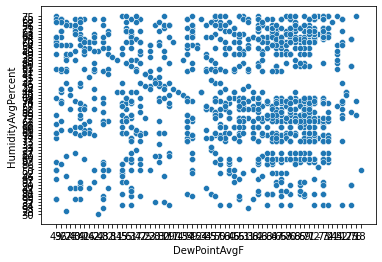

In [41]:
import seaborn as sns
sns.scatterplot(x="DewPointAvgF" ,y="HumidityAvgPercent",data=data)

<AxesSubplot:xlabel='DewPointAvgF', ylabel='SeaLevelPressureAvgInches'>

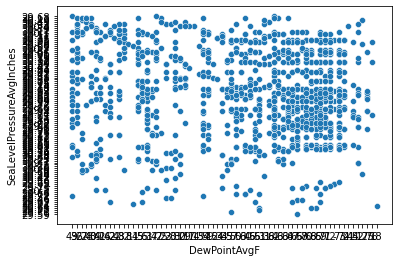

In [42]:
sns.scatterplot(x="DewPointAvgF", y="SeaLevelPressureAvgInches",data=data)

In [43]:
y_test = list()
for i in y_test:
    y_test.append(i[0])

In [44]:
y_test

[]

In [45]:
y_pred = list()
for i in y_pred:
    y_pred.append(i[0]) 

In [46]:
y_pred

[]

In [47]:
data2 = pd.DataFrame(data = (zip(y_test,y_pred)),columns=['Actual','Predicted'])

In [48]:
data2

,Actual,Predicted


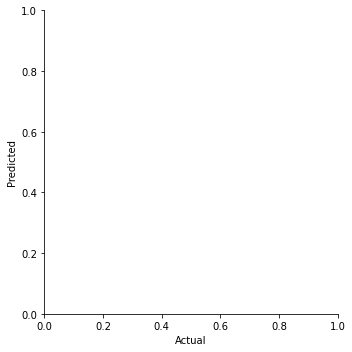

In [49]:
sns.lmplot(x='Actual',y='Predicted',data=data2)

<AxesSubplot:>

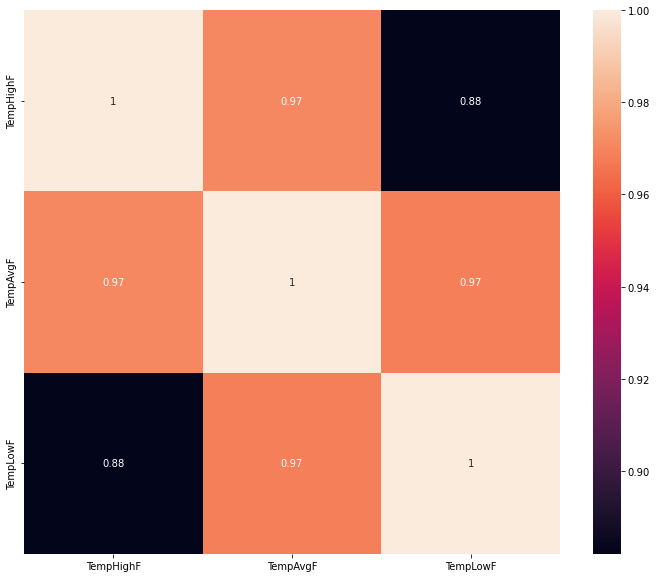

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)